In [38]:
#Importar las librerias que vamos a usar 
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score



In [39]:
#importamos el dataframe 
data=pd.read_csv("nissan-dataset.csv")
data 

,id,full_name,age,gender,model,color,performance,km,condition,price
0,1,Dominic Applin,42.0,Male,Quest,Mauv,299.0,509305.0,very bad,40394.91
1,2,Lenee Eteen,54.0,Polygender,R'nessa,Orange,109.0,965853.0,old,8687.90
2,3,Kendal Esselin,37.0,Male,March / Micra,Teal,52.0,380906.0,bad,44705.31
3,4,Nehemiah Marvelley,55.0,Male,Gloria,Green,336.0,573171.0,very good,32889.88
4,5,Domenic McGeouch,21.0,Male,Avenir,Khaki,2.0,809470.0,old,6949.22
...,...,...,...,...,...,...,...,...,...,...
9995,9996,Mike Wilson,63.0,Polygender,Juke,Yellow,339.0,715741.0,new,19710.18
9996,9997,Katie Wilson,45.0,Female,Maxima,Gray,81.0,786768.0,bad,47797.76
9997,9998,Jane Davis,27.0,Female,Leaf,Yellow,130.0,99170.0,very bad,35058.91
9998,9999,Katie Smith,68.0,Male,March / Micra,Green,215.0,640764.0,old,21176.71


In [40]:
#analizamos y limpiamos los datos 
data.shape

(10000, 10)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10000 non-null  int64  
 1   full_name    9157 non-null   object 
 2   age          9154 non-null   float64
 3   gender       9144 non-null   object 
 4   model        9130 non-null   object 
 5   color        9139 non-null   object 
 6   performance  9143 non-null   float64
 7   km           9141 non-null   float64
 8   condition    9151 non-null   object 
 9   price        9159 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 781.4+ KB


In [42]:
#miramos los datos faltantes
data.isna().sum()

id               0
full_name      843
age            846
gender         856
model          870
color          861
performance    857
km             859
condition      849
price          841
dtype: int64

<Axes: title={'center': 'Age Column'}, ylabel='Frequency'>

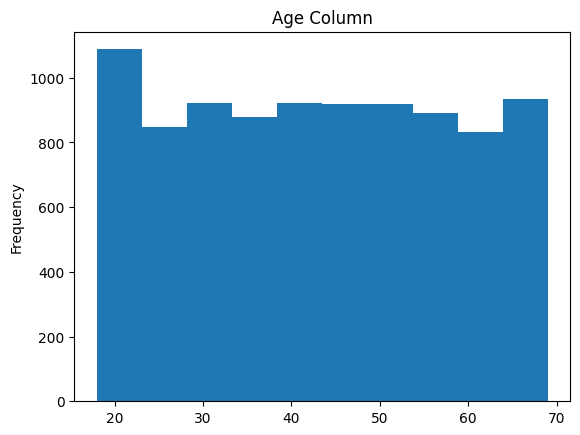

In [43]:
#tenemos que rellenar los nulos de algunas columnas 
#visualización de la edad según la frequencia
data['age'].plot(kind='hist', title='Age Column')

In [44]:
data['age'].fillna(data['age'].mean(), inplace=True)

In [45]:
data['performance'].fillna(data['performance'].mean(), inplace=True)

C:\Users\elicr\AppData\Local\Temp\ipykernel_20852\1886755271.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['performance'].fillna(data['performance'].mean(), inplace=True)


<Axes: title={'center': 'km Column'}, ylabel='Frequency'>

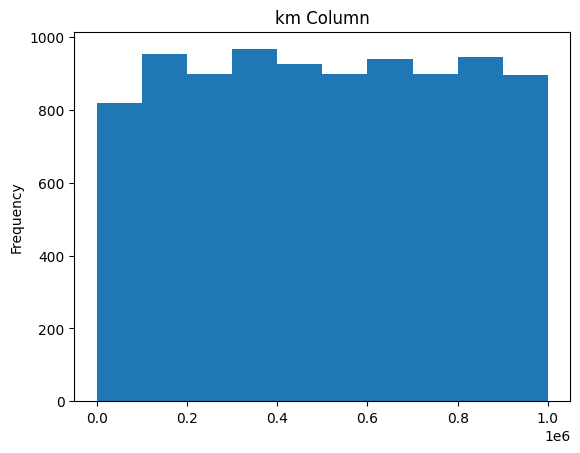

In [46]:
#visualización de la columna km totales de conduccion de cada coche según la frequencia
data['km'].plot(kind='hist', title='km Column')

In [47]:
data['km'].fillna(data['km'].mean(), inplace=True)

In [48]:
data.isna().sum()

id               0
full_name      843
age              0
gender         856
model          870
color          861
performance      0
km               0
condition      849
price          841
dtype: int64

In [49]:
data.dropna(inplace=True)

In [50]:
#verificamos que el dataset este libre de nulos
data.isna().sum()

id             0
full_name      0
age            0
gender         0
model          0
color          0
performance    0
km             0
condition      0
price          0
dtype: int64

In [51]:
data.shape

(9090, 10)

In [52]:
data.columns

Index(['id', 'full_name', 'age', 'gender', 'model', 'color', 'performance',
       'km', 'condition', 'price'],
      dtype='object')

In [53]:
data.drop(['id', 'full_name'], axis=1, inplace=True)

In [54]:
data.shape

(9090, 8)

In [55]:
#nos centramos solo en unos pocos ejemplos 
data.head()

,age,gender,model,color,performance,km,condition,price
0,42.0,Male,Quest,Mauv,299.0,509305.0,very bad,40394.91
1,54.0,Polygender,R'nessa,Orange,109.0,965853.0,old,8687.90
2,37.0,Male,March / Micra,Teal,52.0,380906.0,bad,44705.31
3,55.0,Male,Gloria,Green,336.0,573171.0,very good,32889.88
4,21.0,Male,Avenir,Khaki,2.0,809470.0,old,6949.22


In [56]:
#sacamos los valores únicos de cada columna 
print("Unique Values in color column: ", data['color'].nunique())
print("Unique Values in gender column: ", data['gender'].nunique())
print("Unique Values in model column: ", data['model'].nunique())
print("Unique Values in condition column: ", data['condition'].nunique())

Unique Values in color column:  23
Unique Values in gender column:  8
Unique Values in model column:  70
Unique Values in condition column:  6


In [57]:
data['gender'].unique()

array(['Male', 'Polygender', 'Genderqueer', 'Female', 'Genderfluid',
       'Agender', 'Bigender', 'Non-binary'], dtype=object)

In [58]:
#convertimos las columnas categoricas con dummies 
cod_df = pd.get_dummies(data, columns=['color', 'gender', 'model', 'condition'])
cod_df


,age,performance,km,price,color_Aquamarine,color_Black,color_Blue,color_Crimson,color_Fuscia,color_Goldenrod,...,model_Versa,model_Wingroad,model_X-Trail,model_Xterra,condition_bad,condition_good,condition_new,condition_old,condition_very bad,condition_very good
0,42.0,299.0,509305.0,40394.91,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,54.0,109.0,965853.0,8687.90,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,37.0,52.0,380906.0,44705.31,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,55.0,336.0,573171.0,32889.88,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,21.0,2.0,809470.0,6949.22,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,63.0,339.0,715741.0,19710.18,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
9996,45.0,81.0,786768.0,47797.76,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
9997,27.0,130.0,99170.0,35058.91,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9998,68.0,215.0,640764.0,21176.71,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [59]:
print(cod_df.columns)

Index(['age', 'performance', 'km', 'price', 'color_Aquamarine', 'color_Black',
       'color_Blue', 'color_Crimson', 'color_Fuscia', 'color_Goldenrod',
       ...
       'model_Versa', 'model_Wingroad', 'model_X-Trail', 'model_Xterra',
       'condition_bad', 'condition_good', 'condition_new', 'condition_old',
       'condition_very bad', 'condition_very good'],
      dtype='object', length=111)


In [60]:
#establecemos las variables de entrenemiento 
#Features: 
X = cod_df.drop('price', axis=1)
#Target:
y = cod_df['price']

In [61]:
#realizamos el primer test de entrenamiento 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
#verificamos el shape de los modelos de etrenamiento
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (7272, 110)
Test set shape: (1818, 110)


In [63]:
#Predicciones usando la regresión 
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [64]:
linear_regression_predictions = linear_regression_model.predict(X_test)

In [65]:
#calculamos las métricas de la regresión linear 
mse_linear = mean_squared_error(y_test, linear_regression_predictions)
r2_linear = r2_score(y_test, linear_regression_predictions)
print("Linear Regression - Mean Squared Error: {:.2f}".format(mse_linear))
print("Linear Regression - R^2 Score: {:.2f}".format(r2_linear))

Linear Regression - Mean Squared Error: 193932689.82
Linear Regression - R^2 Score: -0.03


In [66]:
#visualizamos los valores actuales con los valores de la predicción 

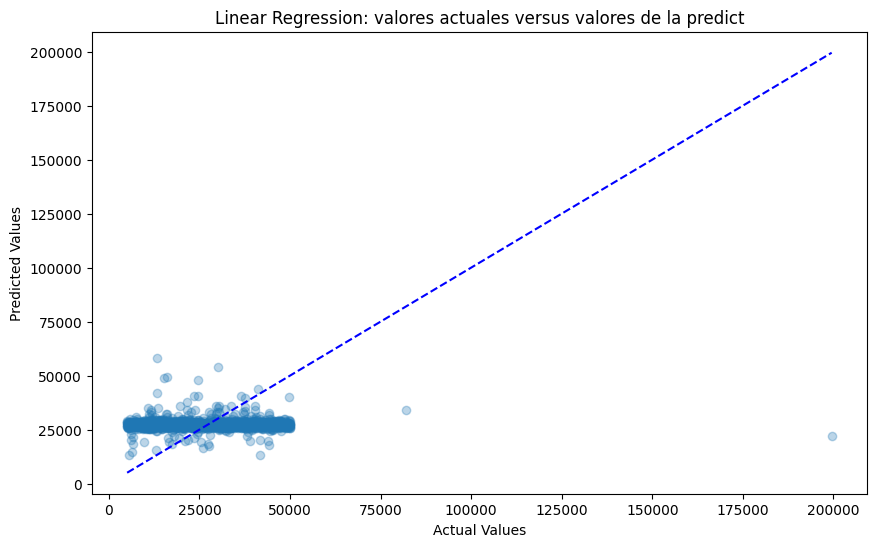

In [67]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, linear_regression_predictions, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="blue", linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: valores actuales versus valores de la predict")
plt.show()

In [68]:
#utilizamos otro método de predict con Decision Tree 
decision_tree_regressor = DecisionTreeRegressor()
decision_tree_regressor.fit(X_train, y_train)


DecisionTreeRegressor()

In [69]:
decision_tree_predictions = decision_tree_regressor.predict(X_test)

In [70]:
#calculamos las métricas de la Decision Tree Regressor 
mse_tree = mean_squared_error(y_test, decision_tree_predictions)
r2_tree = r2_score(y_test, decision_tree_predictions)
print("Decision Tree Regressor - Mean Squared Error: {:.2f}".format(mse_tree))
print("Decision Tree Regressor - R^2 Score: {:.2f}".format(r2_tree))

Decision Tree Regressor - Mean Squared Error: 358837857.03
Decision Tree Regressor - R^2 Score: -0.90


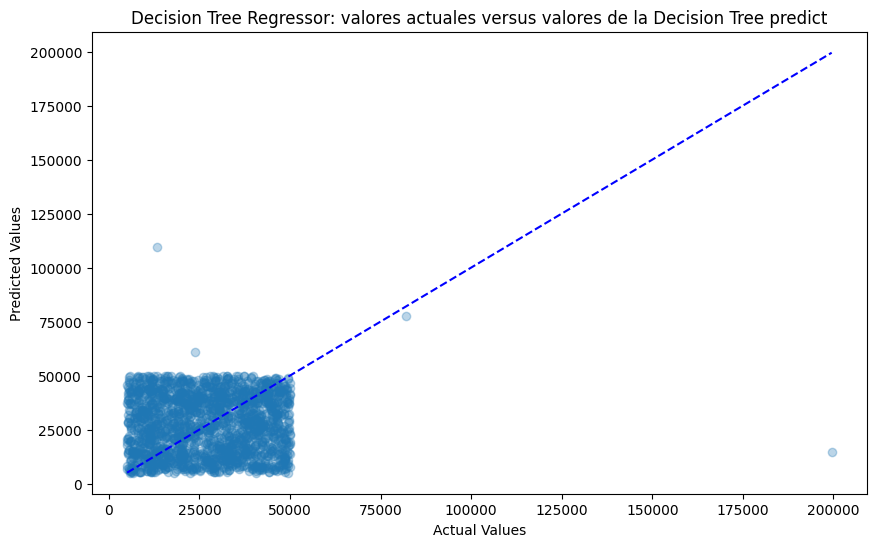

In [71]:
#visualización valorers actuales versus valores de la decision Tree predict 
plt.figure(figsize=(10, 6))
plt.scatter(y_test, decision_tree_predictions, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="blue", linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Decision Tree Regressor: valores actuales versus valores de la Decision Tree predict")
plt.show()

In [75]:
#tercer modelo de predict con Random Forest
random_forest_regressor = RandomForestRegressor(n_estimators=100)
random_forest_regressor.fit(X_train, y_train)

RandomForestRegressor()

In [76]:
random_forest_predictions = random_forest_regressor.predict(X_test)

In [77]:
#calculamos las métricas de Random Forest 
mse_forest = mean_squared_error(y_test, random_forest_predictions)
r2_forest = r2_score(y_test, random_forest_predictions)
print("Random Forest Regressor - Mean Squared Error: {:.2f}".format(mse_forest))
print("Random Forest Regressor - R^2 Score: {:.2f}".format(r2_forest))

Random Forest Regressor - Mean Squared Error: 196149112.12
Random Forest Regressor - R^2 Score: -0.04


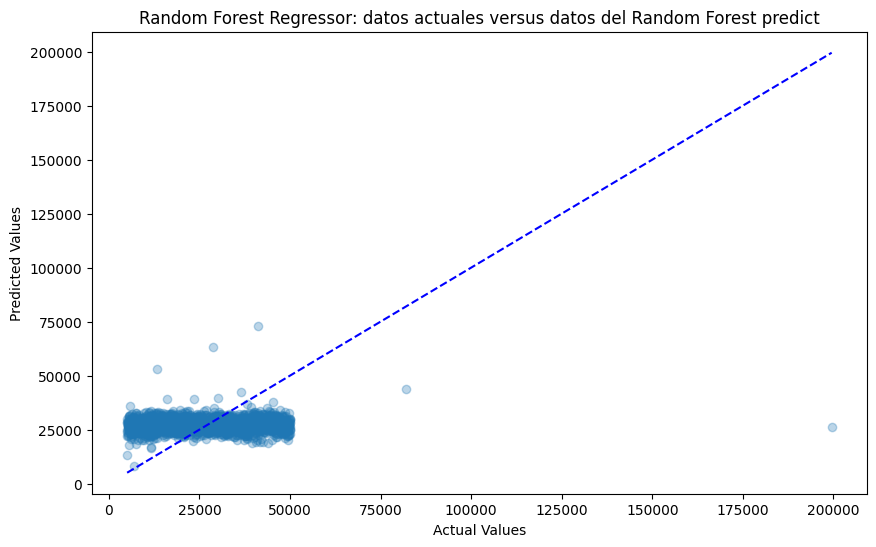

In [78]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, random_forest_predictions, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="blue", linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regressor: datos actuales versus datos del Random Forest predict")
plt.show()

In [79]:
#podemos probar con el método GridSearchCV 
#establecemos nuevas variables:
param_grid_lr = {}
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}
param_grid_rf = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}
param_grid_svr = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.3]
}
param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

In [80]:
#creamos los modelos 
models = {
    'Linear Regression': (LinearRegression(), param_grid_lr),
    'Decision Tree Regressor': (DecisionTreeRegressor(), param_grid_dt),
    'Random Forest Regressor': (RandomForestRegressor(), param_grid_rf),
    'K-Neighbors Regressor': (KNeighborsRegressor(), param_grid_knn),
    'Support Vector Regressor': (SVR(), param_grid_svr),
    'Gradient Boosting Regressor': (GradientBoostingRegressor(), param_grid_gb)
}

In [37]:
#entrenamos los modelos para elegir el mejor modelo
best_models = {}
for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"{model_name} - Best Parameters: {grid_search.best_params_}")
    print(f"{model_name} - Best CV Score: {grid_search.best_score_:.2f}")

Linear Regression - Best Parameters: {}
Linear Regression - Best CV Score: -0.03
Decision Tree Regressor - Best Parameters: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 20}
Decision Tree Regressor - Best CV Score: -0.02
Random Forest Regressor - Best Parameters: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Regressor - Best CV Score: -0.00
K-Neighbors Regressor - Best Parameters: {'n_neighbors': 9, 'weights': 'uniform'}
K-Neighbors Regressor - Best CV Score: -0.11


KeyboardInterrupt: 

In [88]:
#probamos el mejor modelo
def evaluate_model(model, X_test, y_test, model_name):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"{model_name} - Test Mean Squared Error: {mse:.2f}")
    print(f"{model_name} - Test R^2 Score: {r2:.2f}")
    plot_predictions(y_test, predictions, model_name)

In [89]:
#visualización de los valores actuales y del modelo predict 

In [91]:
def plot_predictions(y_test, predictions, model_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, predictions, alpha=0.3)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="blue", linestyle='--')
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f'{model_name}: Actual vs Predicted Values')
    plt.show()

Linear Regression - Test Mean Squared Error: 188205296.23
Linear Regression - Test R^2 Score: 0.00


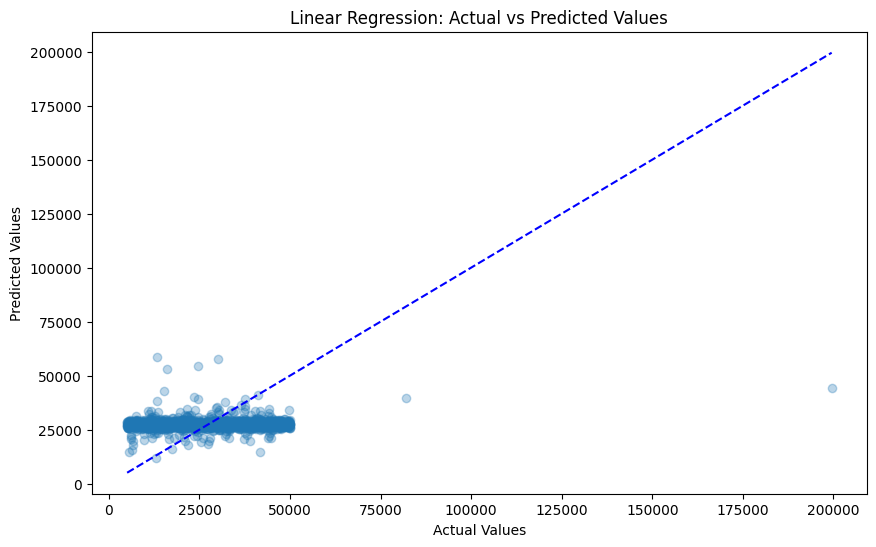

Decision Tree Regressor - Test Mean Squared Error: 186693265.32
Decision Tree Regressor - Test R^2 Score: 0.01


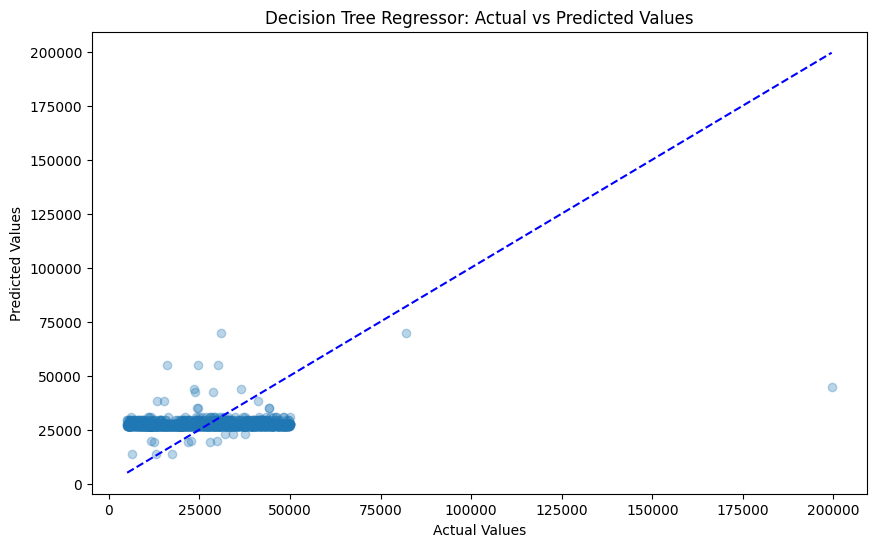

Random Forest Regressor - Test Mean Squared Error: 175788292.24
Random Forest Regressor - Test R^2 Score: 0.07


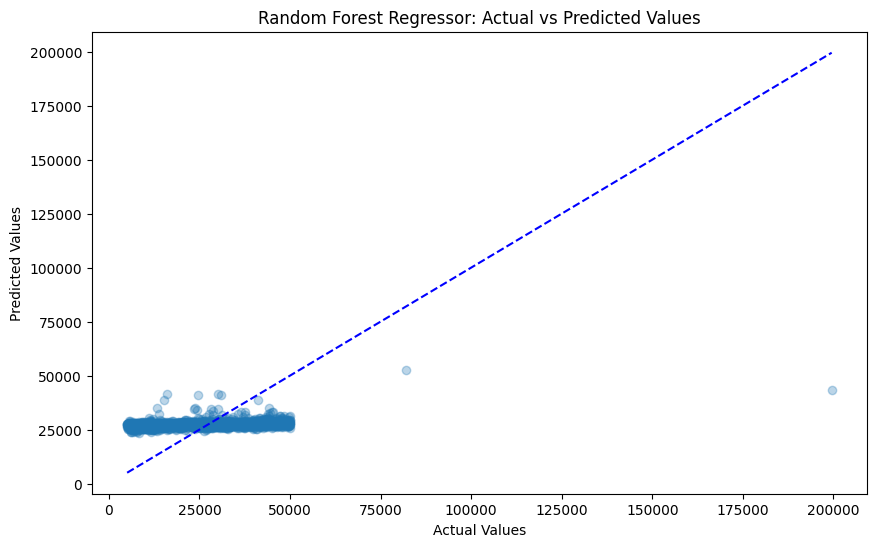

K-Neighbors Regressor - Test Mean Squared Error: 180017504.74
K-Neighbors Regressor - Test R^2 Score: 0.05


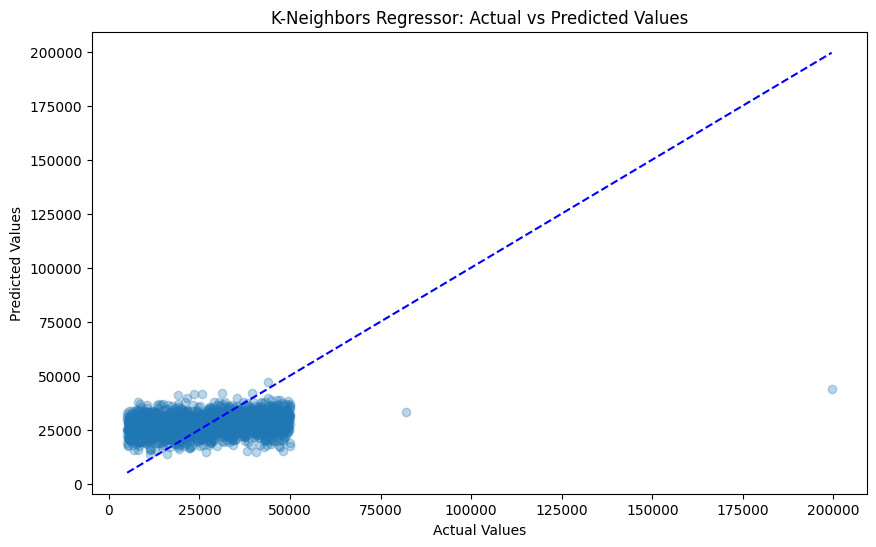

In [92]:
for model_name, best_model in best_models.items():
    evaluate_model(best_model, X_test, y_test, model_name)